In [56]:
import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("bank-additional-full.csv", delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [32]:
# deal with duplicates
df.drop_duplicates(keep='first', inplace=True)

# remove socio-economic factors
df = df.drop(labels=["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"], axis=1)

In [33]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


In [34]:
category_columns = df.columns.tolist()
category_columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [43]:
#deal with 'unknown', replace them with median
list = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
for col in list:
    df[col].replace('unknown', pd.NA, inplace=True)
    le = LabelEncoder()
    nonan_series = df[col].fillna('missing')
    df[col] = le.fit_transform(nonan_series)
    df.loc[nonan_series == 'missing', col] = pd.NA
    mean_value = df[col].astype('float').mean().round()
    df[col].fillna(mean_value, inplace=True)
    df[col] = df[col].astype(int)

<ipython-input-43-a28d4ef678c4>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace('unknown', pd.NA, inplace=True)
<ipython-input-43-a28d4ef678c4>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [44]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,0
1,57,8,1,3,1,0,0,1,6,1,149,1,999,0,1,0
2,37,8,1,3,0,2,0,1,6,1,226,1,999,0,1,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,0
4,56,8,1,3,0,0,2,1,6,1,307,1,999,0,1,0
5,45,8,1,2,1,0,0,1,6,1,198,1,999,0,1,0
6,59,0,1,6,0,0,0,1,6,1,139,1,999,0,1,0
7,41,1,1,5,1,0,0,1,6,1,217,1,999,0,1,0
8,24,10,3,6,0,2,0,1,6,1,380,1,999,0,1,0
9,25,8,3,3,0,2,0,1,6,1,50,1,999,0,1,0


In [46]:
X = df.drop('y', axis=1)
y = df['y']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pprob = model.predict(X_test)
y_p = np.where(y_pprob > 0.5, 1, 0)

# evaluation
accuracy = accuracy_score(y_test, y_p)
conf_matrix = confusion_matrix(y_test, y_p)
class_report = classification_report(y_test, y_p)

# ROC report
f, t, _ = roc_curve(y_test, y_pprob)
roc_auc = auc(f, t)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC value:\n", roc_auc)

Accuracy: 0.90002428559864
Confusion Matrix:
 [[10705   224]
 [ 1011   413]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     10929
           1       0.65      0.29      0.40      1424

    accuracy                           0.90     12353
   macro avg       0.78      0.63      0.67     12353
weighted avg       0.88      0.90      0.88     12353

ROC value:
 0.8828642175595083


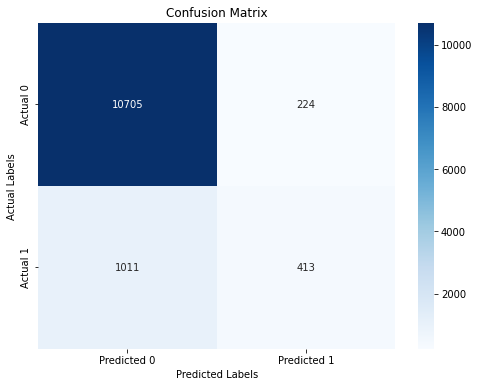

In [54]:
#the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

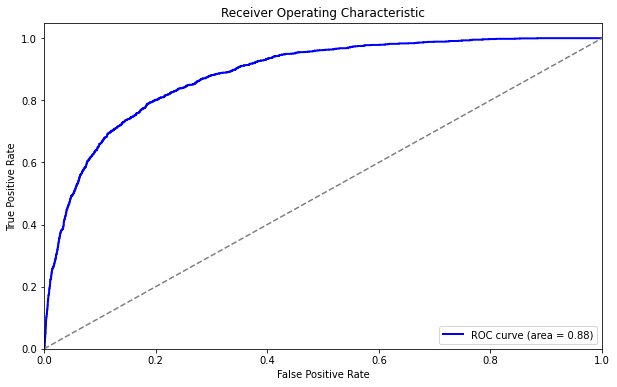

In [59]:
#the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(f, t, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#find out the correlations between each variable and 'y'

In [61]:
feature_names = X.columns
coefficients = model.coef_

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

print("Feature Coefficients:\n", coef_df)

Feature Coefficients:
         Feature  Coefficient  Absolute Coefficient
10     duration     0.123614              0.123614
12        pdays    -0.062296              0.062296
13     previous     0.027845              0.027845
7       contact    -0.026834              0.026834
14     poutcome     0.021057              0.021057
4       default    -0.017704              0.017704
0           age     0.015986              0.015986
2       marital     0.013877              0.013877
3     education     0.009197              0.009197
11     campaign    -0.004756              0.004756
6          loan    -0.002085              0.002085
8         month     0.001607              0.001607
1           job     0.001376              0.001376
9   day_of_week     0.001123              0.001123
5       housing    -0.000183              0.000183


In [62]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['y'].drop('y') 
correlation_with_target = correlation_with_target.abs().sort_values(ascending=False)

print("Correlation with target variable:\n", correlation_with_target)

Correlation with target variable:
 duration       0.405297
pdays          0.324948
previous       0.230202
contact        0.144774
poutcome       0.129810
default        0.099364
campaign       0.066361
education      0.055719
marital        0.051444
age            0.030381
job            0.028227
day_of_week    0.015970
housing        0.011613
month          0.006051
loan           0.004922
Name: y, dtype: float64
